# ECE-143-Wildfire-Project

The Group Repository containing everyone's code.

**Team Members:** 

David Belman, Aiden Rosen, Mahesh  
Ananthakrishnan Rameshkumar, Boran Jia, & Jacob Brown  


## Objective: 

The Purpose of this project is to Perform comprehensive analysis on forest fires, analyzing cause, size of fire, seasonal effects, spatial effects and terrain effects.  

## Data Extraction and Cleaning

This code uses our functions defined in DataExtractionCleaning.py to put our data into a Pandas Dataframe and has functions designed to filter data.

In [1]:
#necessary imports
from Data_Extracting_and_Cleaning import DataExtractionCleaning as dec
#from Data_Extracting_and_Cleaning.Utils import Directory_utils as Dir
from Analysis_and_Visualization_for_Obtaining_Statistics import AnalysisVisualization as anl


In [2]:
#load the Dataset
df = dec.Get_all_data("af-historic-wildfires-1996-2005-data.csv")
df.head()

,fire_number,fire_name,calendar_year,assessment_datetime,assessment_hectares,current_size,size_class,fire_location_latitude,fire_location_longitude,fire_origin,...,fuel_type,other_fuel_type,bh_fs_date,bh_hectares,uc_fs_date,uc_hectares,to_fs_date,to_hectares,ex_fs_date,ex_hectares
0,E01001,NaN,1996,1996-05-06 19:10:00,1.00,1.0,B,56.6914,-111.3831,Provincial Land,...,matted grass,Known Fuel,1996-05-06 19:20:00,1.0,1996-05-06 19:20:00,1.0,NaT,NaN,1996-05-07 11:00:00,1.0
1,E01002,NaN,1996,1996-05-19 19:37:00,0.40,0.4,B,57.2789,-111.5762,Provincial Land,...,boreal mixedwood - leafless,Known Fuel,1996-05-19 15:30:00,0.4,1996-05-19 15:30:00,0.4,NaT,NaN,1996-05-19 18:15:00,0.4
2,E01003,NaN,1996,1996-05-24 21:00:00,1.00,4.0,B,58.2523,-110.5540,Indian Reservation,...,Jack or Lodgepole Pine slash,Willows,1996-05-25 09:58:00,4.0,1996-05-25 09:58:00,4.0,1996-05-25 15:59:00,4.0,1996-05-25 16:00:00,4.0
3,E01004,NaN,1996,1996-05-29 17:14:00,0.02,1.2,B,57.7477,-112.6786,Provincial Land,...,boreal spruce,Known Fuel,1996-05-29 20:05:00,1.2,1996-05-30 13:00:00,1.2,NaT,NaN,1996-05-30 20:10:00,1.2
4,E01005,NaN,1996,1996-05-30 15:35:00,0.04,1.6,B,57.5501,-111.2103,Provincial Land,...,mature Jack or Lodgepole Pine,Known Fuel,1996-05-31 01:00:00,0.8,1996-05-31 01:00:00,0.8,NaT,NaN,1996-05-31 20:00:00,1.6


## Analysis and Visualization

Breakdown of Fires by Year:  
While most years have a considerable number of fires 1998 and 2002 have considerably more hecatares burned than the other years meaning these years fires had a devastating effect.

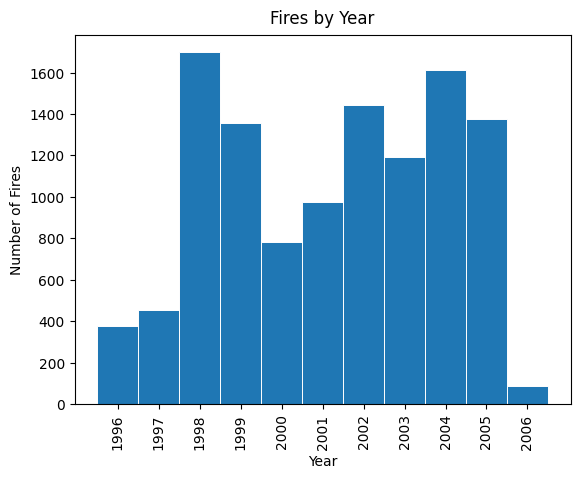

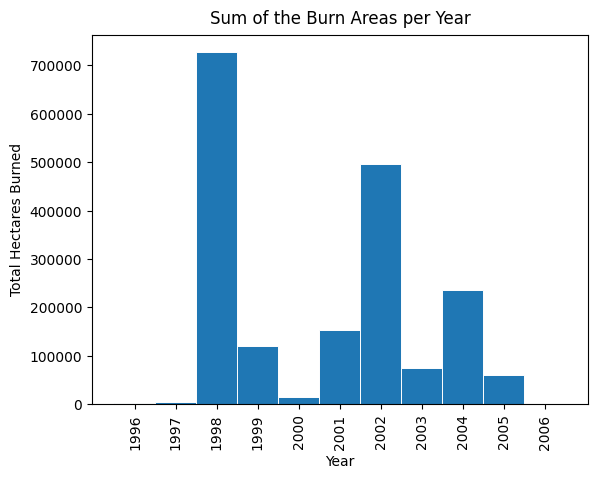

In [3]:
anl.plot_graph_of_series(df["calendar_year"].value_counts(sort=False), "bar", "Fires by Year", ["Year", "Number of Fires"])
sum_burn_area_by_year = anl.get_operation_of_series_based_on_another_series(df,["calendar_year","ex_hectares"], op= 'sum')
anl.plot_graph_of_series(sum_burn_area_by_year, "bar", "Sum of the Burn Areas per Year", ["Year", "Total Hectares Burned"])

Pie Chart of the general Causes of Fires

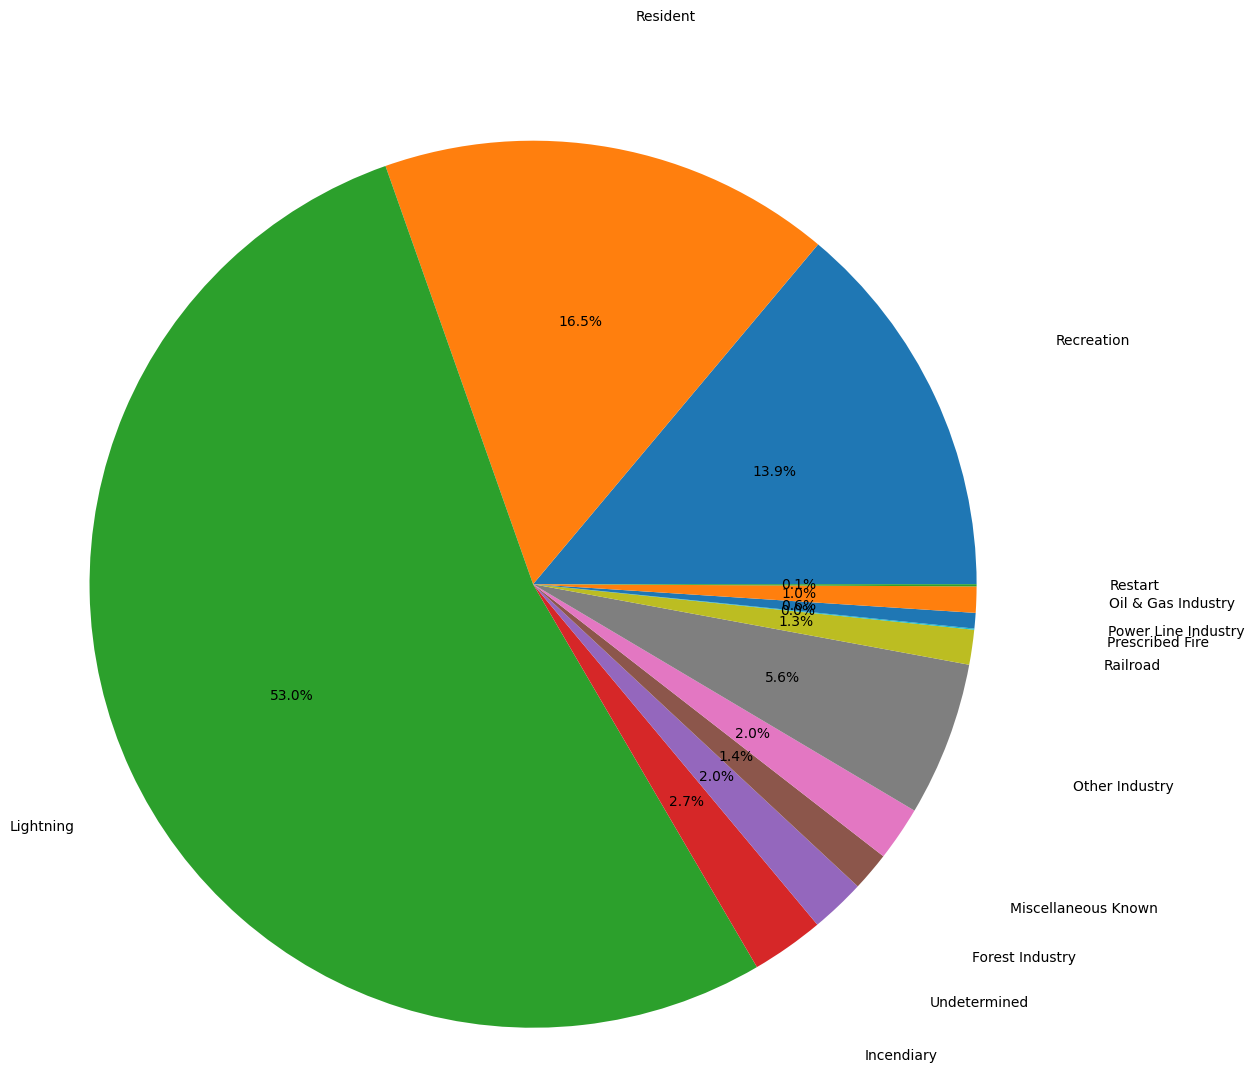

In [4]:
anl.plot_graph_of_series(df["general_cause_desc"].value_counts(sort = False), "pie", "")

When the general cause is not lightning our dataset provides us with a secondary True Cause when reported.

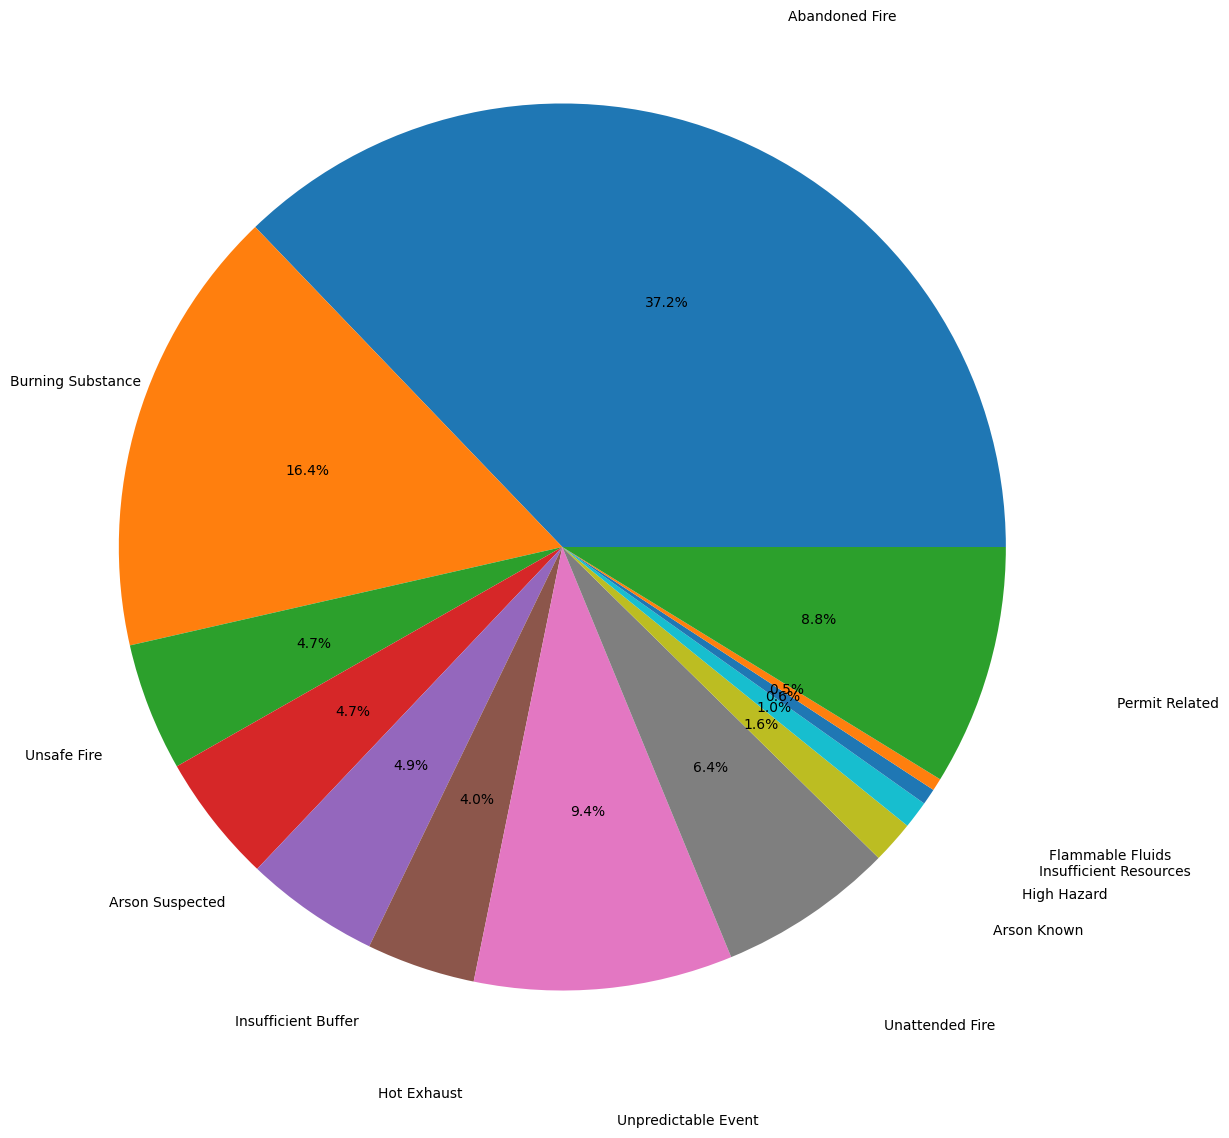

In [5]:
anl.plot_graph_of_series(df["true_cause"].value_counts(sort= False), "pie", "")

Breakdown of fires cause by industry

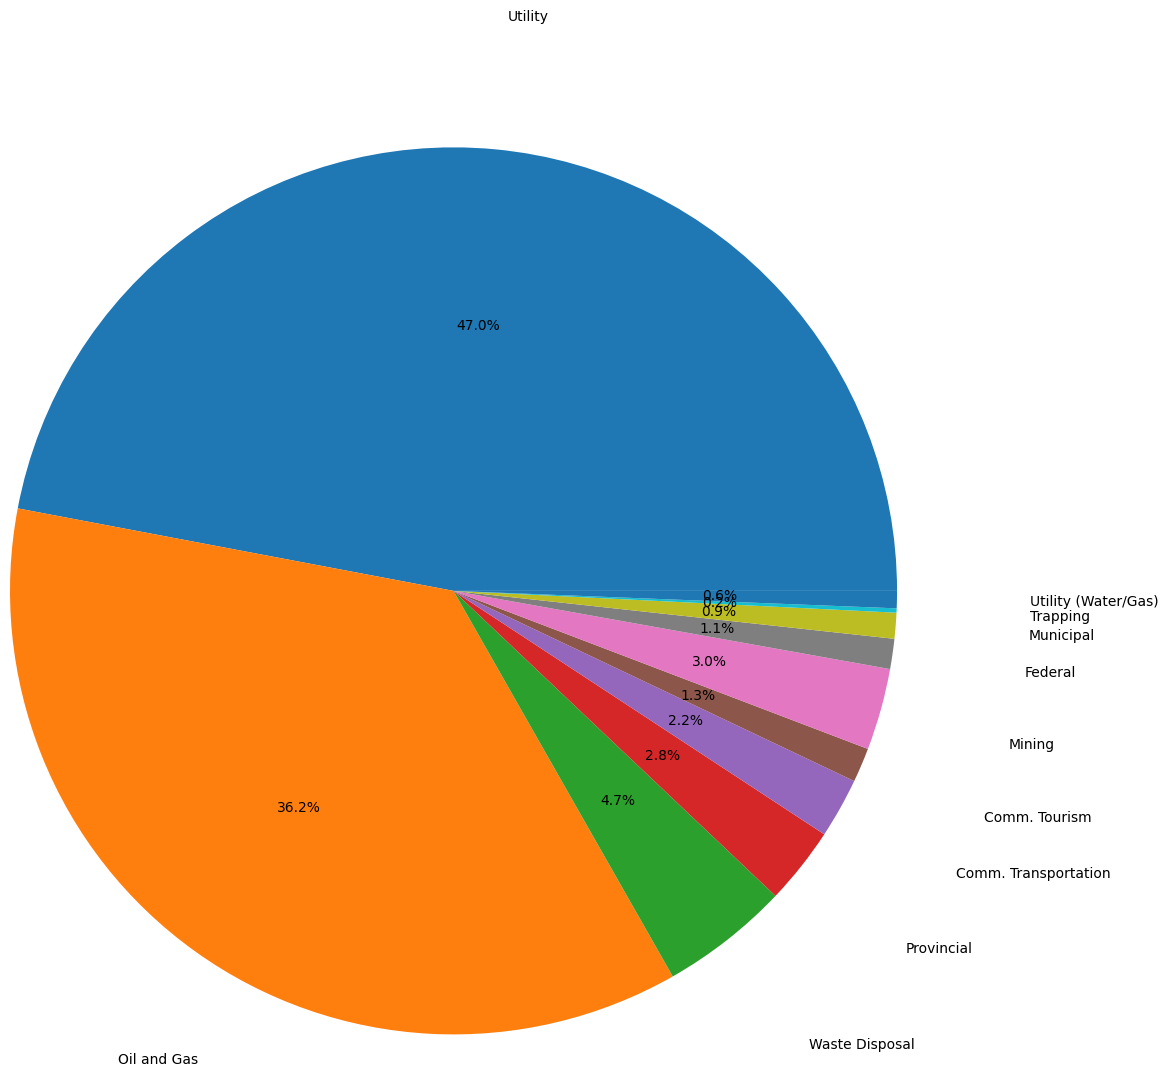

In [6]:
anl.plot_graph_of_series(df["industry_identifier_desc"].value_counts(sort= False), "pie", "")

Breakdown of Fires by responsible parties

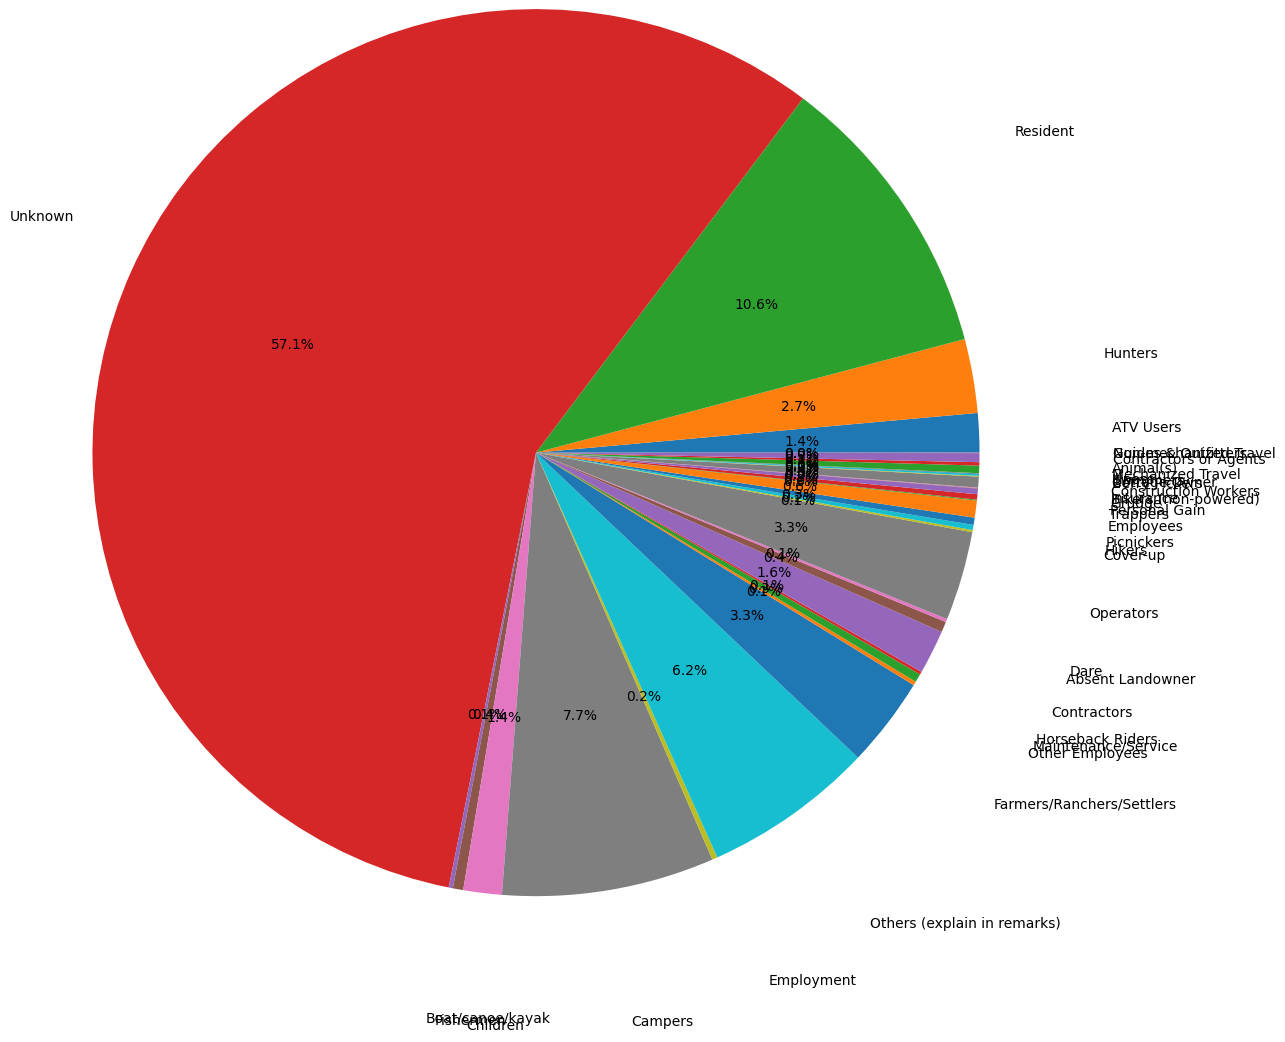

In [7]:
anl.plot_graph_of_series(df["responsible_group_desc"].value_counts(sort= False), "pie", "")

Breakdown of Fires by activities (when applicable)

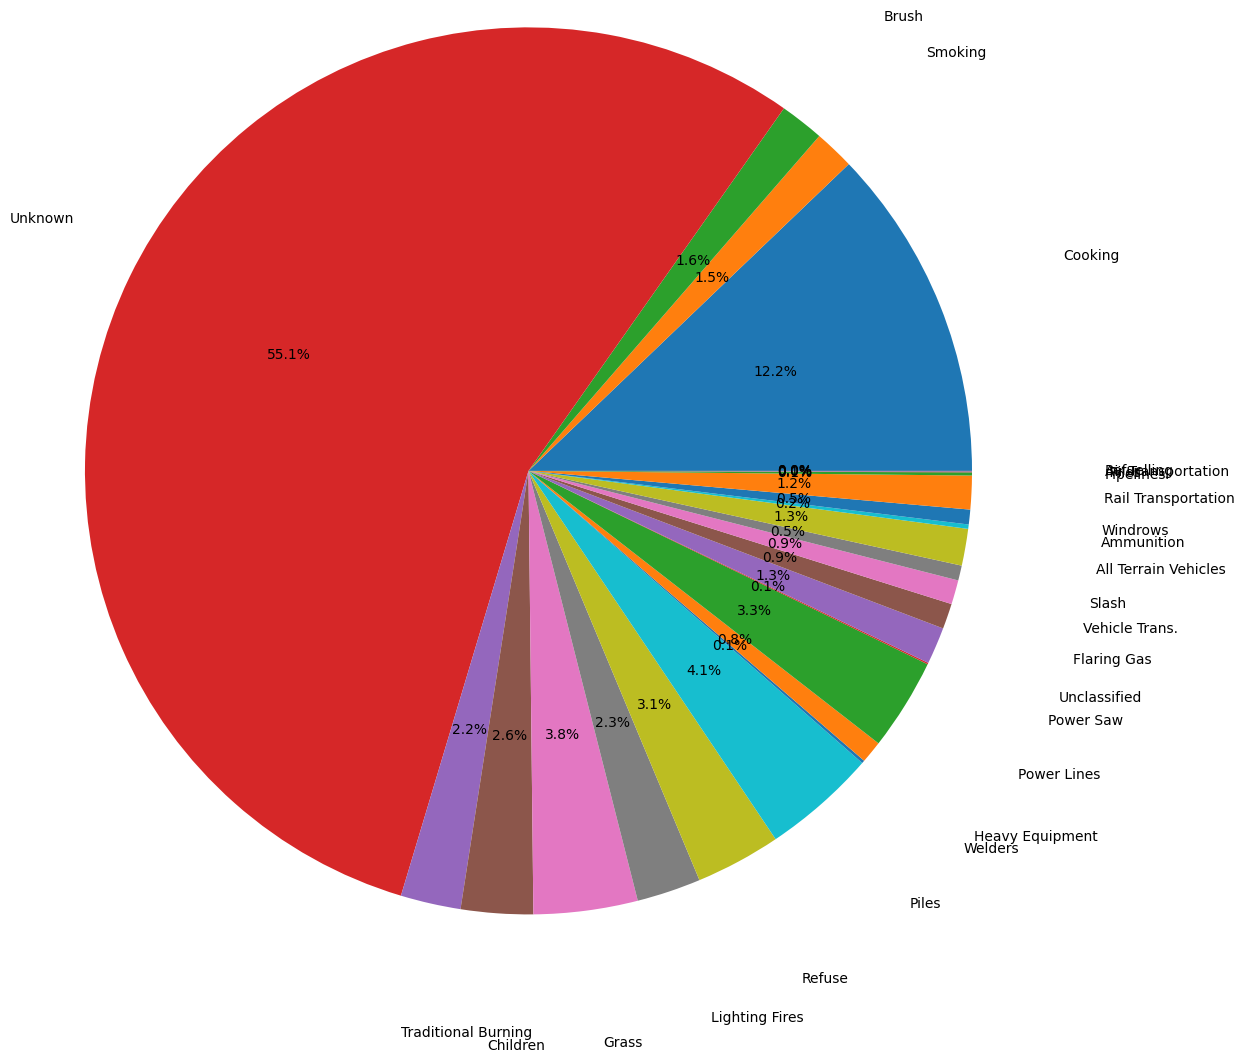

In [8]:
anl.plot_graph_of_series(df["activity_class"].value_counts(sort= False), "pie", "")

A breakdown of how weather correlates to the average size of burn areas

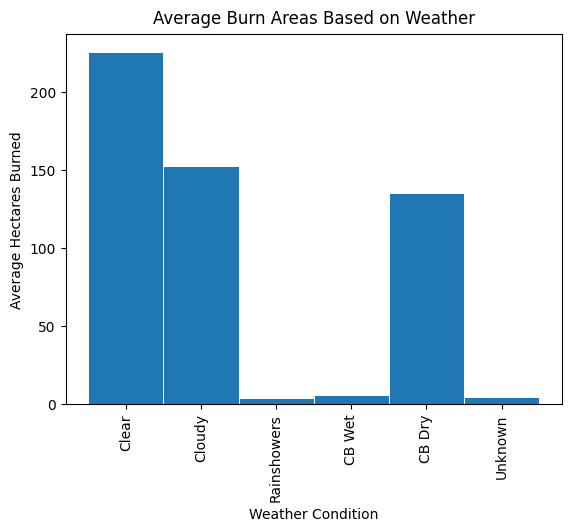

In [9]:
average_burn_area_by_weather = anl.get_operation_of_series_based_on_another_series(df,["weather_conditions_over_fire","ex_hectares"], op= 'mean')
anl.plot_graph_of_series( average_burn_area_by_weather, "bar", "Average Burn Areas Based on Weather", ["Weather Condition", "Average Hectares Burned"])

Breakdown of Fuel Type

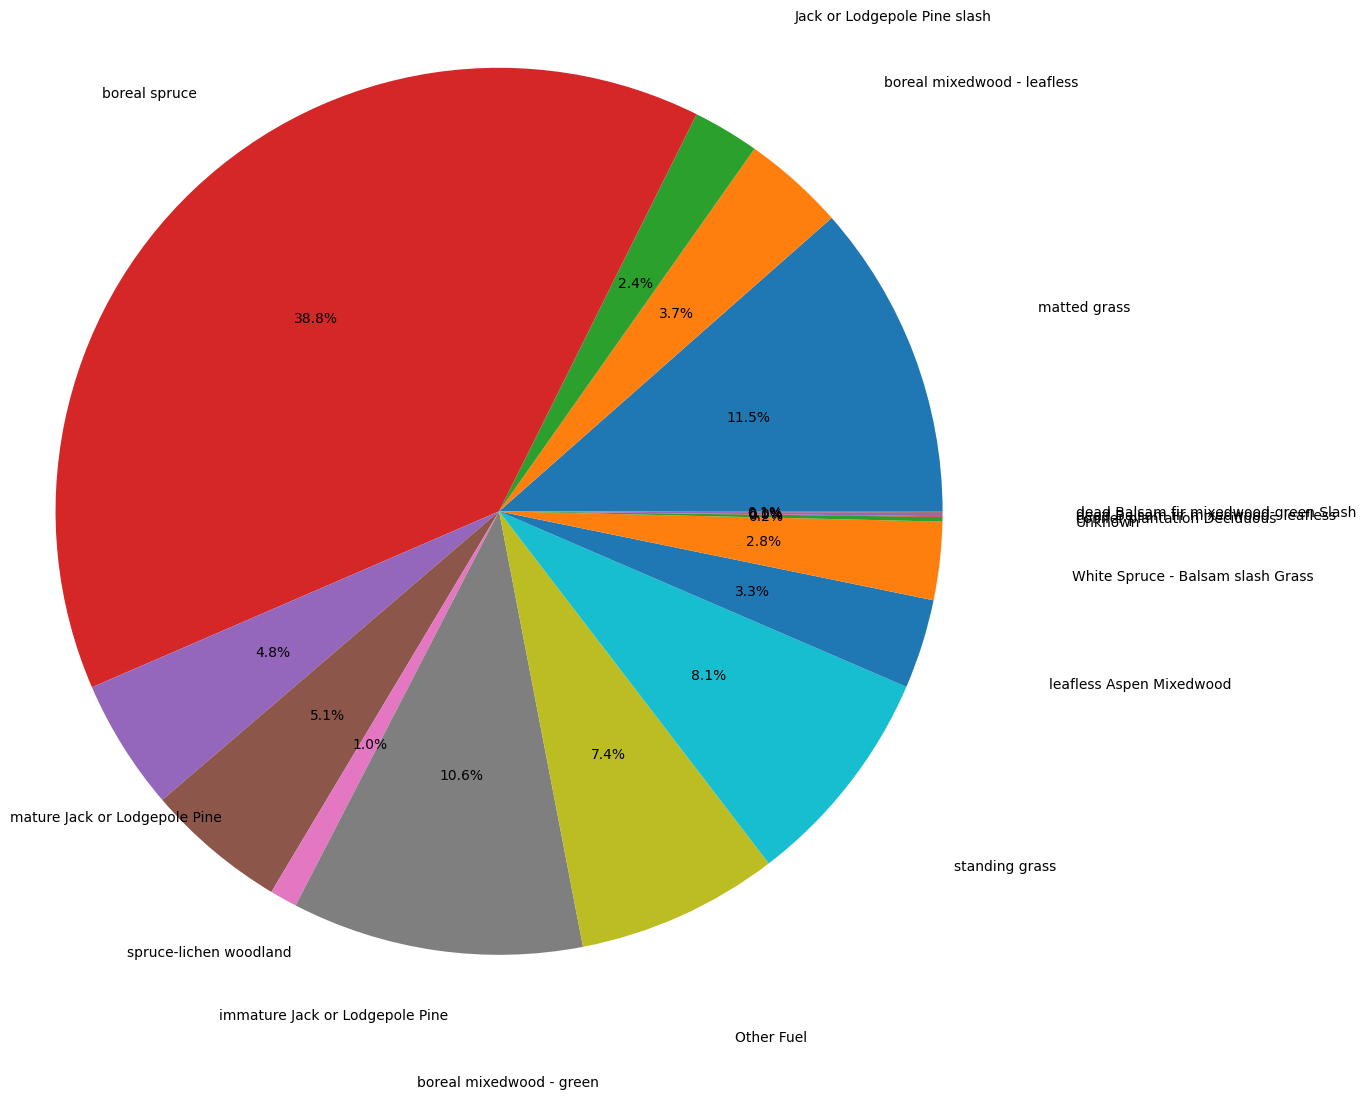

In [10]:
anl.plot_graph_of_series(df["fuel_type"].value_counts(sort= False), "pie", "")

We can then take the average areas based on fuel type to find which fuels result in the biggest fires

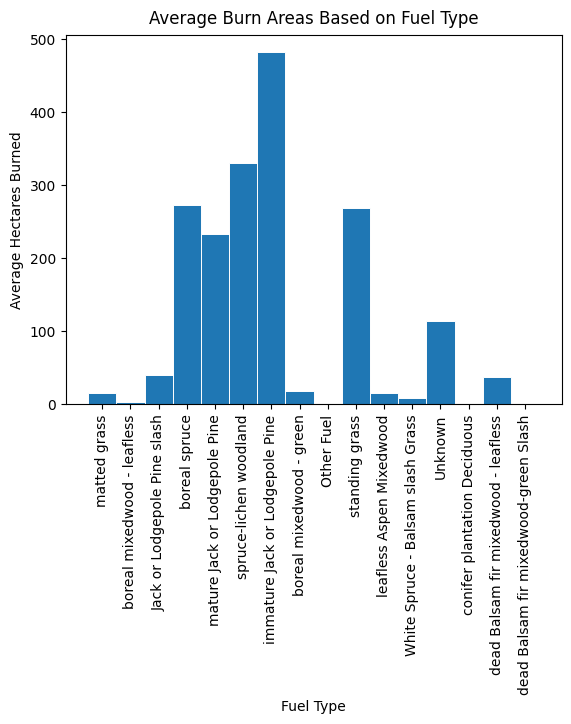

In [11]:
average_burn_area_by_fuel_type = anl.get_operation_of_series_based_on_another_series(df,["fuel_type","ex_hectares"], op= 'mean')
anl.plot_graph_of_series( average_burn_area_by_fuel_type, "bar", "Average Burn Areas Based on Fuel Type", ["Fuel Type", "Average Hectares Burned"])

Breakdown of Fires by Fire Origin and breakdown of Fire Origin and land burned. DND is Canada's Department of National Defense

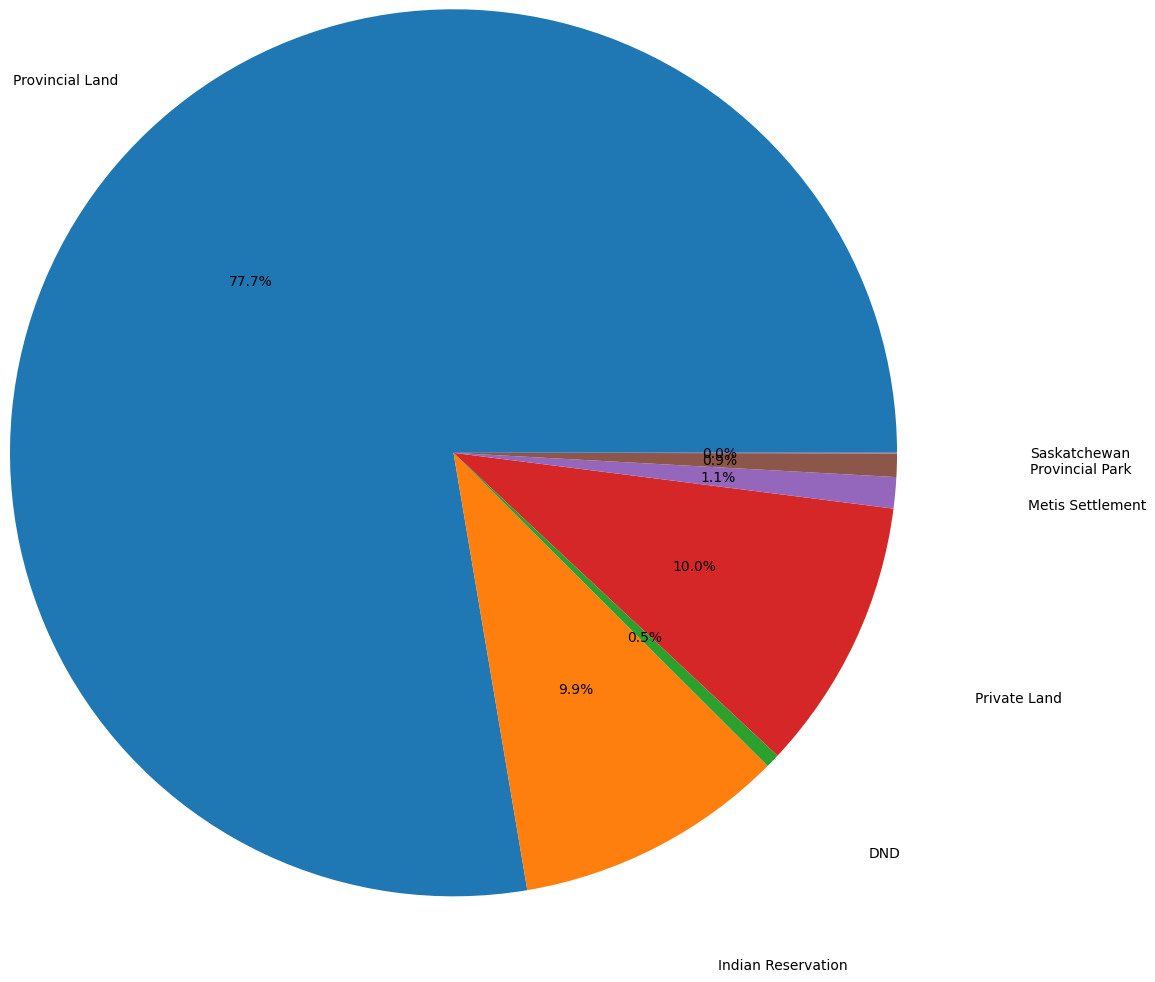

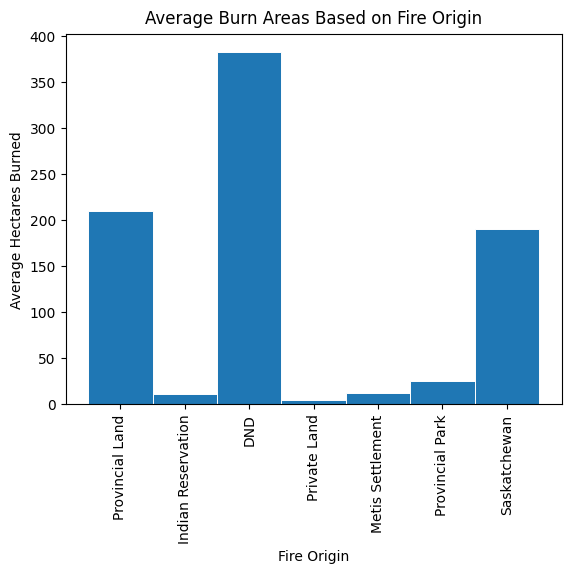

In [12]:
anl.plot_graph_of_series(df["fire_origin"].value_counts(sort= False), "pie", "")
average_burn_area_by_fire_origin = anl.get_operation_of_series_based_on_another_series(df,["fire_origin","ex_hectares"])
anl.plot_graph_of_series( average_burn_area_by_fire_origin, "bar", "Average Burn Areas Based on Fire Origin", ["Fire Origin", "Average Hectares Burned"])

## Breakdown of Fires by Fire Type:  
### Ground Fires:
Ground fires – also known as ‘subsurface fires’ – can occur in areas with large accumulations of dead vegetation over time, such as humus and peat. They move slowly beneath the surface terrain, making them difficult to see from above. If enough dry fuel is available, ground fires can be extremely difficult put out. In some cases, ground fires can continue to smolder underground throughout the winter and reignite aboveground again in the spring. This scenario is more likely during a period of prolonged drought.  
Ground Fires are more common than crown fires but way less common than surface fires and tend to burn the least amount of land.

### Surface Fires:
Surface fires are the easiest wildfires to put out. They burn detritus such as litter, twigs, and leaves, which sit on the surface of the ground. They can also consume surface vegetation, such as shrubs and grasses.  
We can learn that most fires are surface fires and tend to burn more than ground fires but considerably less than crown fires.

### Crown Fires:
A crown fire, which burns in the tree canopy, is the most dangerous type of wildfire. It burns extremely hot, and often spreads rapidly through the interconnected branches of trees.  
You can see in our bar graph that crown fires typically burn way more land.  
Definitions from [Types of Wildfires](https://wfca.com/wildfire-articles/types-of-wildfire/)

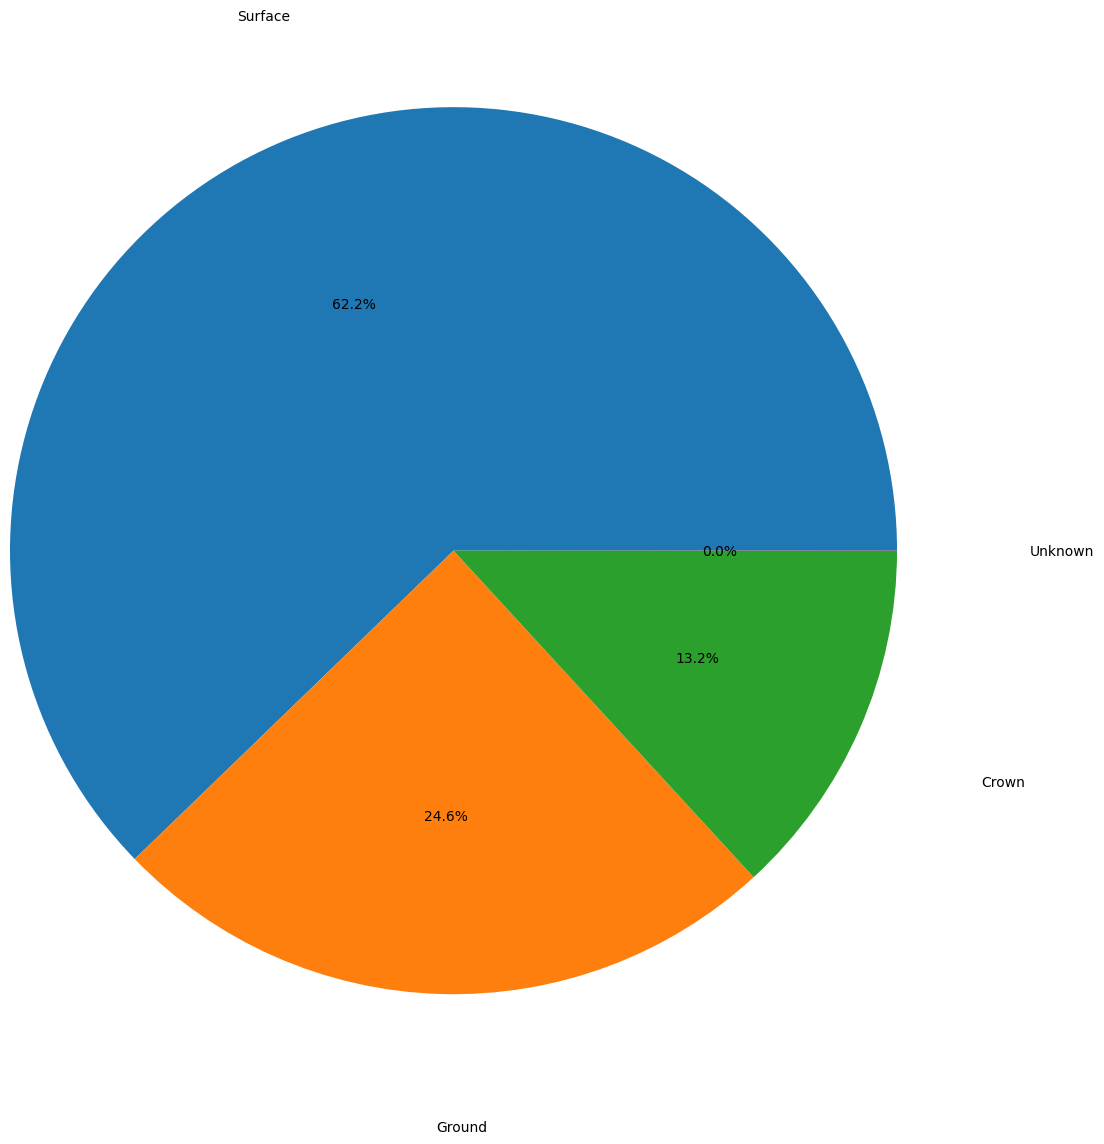

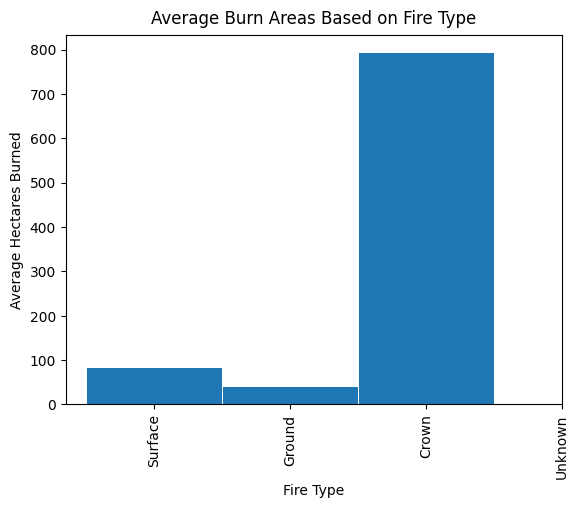

In [13]:
anl.plot_graph_of_series(df["fire_type"].value_counts(sort= False), "pie", "")
average_burn_area_by_fire_type = anl.get_operation_of_series_based_on_another_series(df,["fire_type","ex_hectares"], op= 'mean')
anl.plot_graph_of_series( average_burn_area_by_fire_type, "bar", "Average Burn Areas Based on Fire Type", ["Fire Type", "Average Hectares Burned"])

## Predictions